# PDS2: Midterm 

### Date: April 30

### Time: 15:00 - 17:00


**Instructions:** 
* All answers should be filled in the notebook and then submitted to Moodle;
* For theoretical question you can use markdown and LaTeX;
* Save number of cells used for compilation;
* In order to get max scores, please write explanations and comments for each step. In addition, try to comment your code pieces.
* **Plagiarism will result in FAIL. For example, two students having identical code for solution, then both will get 0 mark for the exam.**


GOOD LUCK!

# Task 1 (30%)
Build regression model of your choice (linear or knn) which should predict count of bike rentals (__bike_rentals.xlsx__). Train your model from dataset in 'train' sheet, and evaluate in 'test' sheet. 

Hints:
* *some of the columns are not valid features, but just random numbers*
* *some of the columns are in fact categorical columns, so it's appropriate use them as categorical features*

Columns description:
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- cnt: count of total rental bikes including both casual and registered

***P.S. Top 3 students in each group, with the smallest MSE in test dataset will get additional bonus points.***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression 
from sklearn import metrics

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


import warnings  # do not show matching warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading the excel file
# data = pd.read_excel('bike_rentals.xlsx')

data1 = pd.read_excel(open('bike_rentals.xlsx', 'rb'),sheet_name='train')

data2 = pd.read_excel(open('bike_rentals.xlsx', 'rb'),sheet_name='test')

data1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,349,2011-12-15,4,0,12,0,4,1,2,0.422500,0.412237,0.634167,0.268042,3709
1,163,2011-06-12,2,0,6,0,0,0,1,0.692500,0.643325,0.747917,0.163567,4460
2,358,2011-12-24,1,0,12,0,6,0,1,0.302500,0.299242,0.542500,0.190304,1011
3,419,2012-02-23,1,1,2,0,4,1,1,0.454167,0.444446,0.554583,0.190913,5062
4,282,2011-10-09,4,0,10,0,0,0,1,0.540833,0.523983,0.727500,0.063450,5511


In [ ]:
print(data1.shape)
print(data2.shape)

(499, 14)
(232, 14)


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     499 non-null    int64         
 1   dteday      499 non-null    datetime64[ns]
 2   season      499 non-null    int64         
 3   yr          499 non-null    int64         
 4   mnth        499 non-null    int64         
 5   holiday     499 non-null    int64         
 6   weekday     499 non-null    int64         
 7   workingday  499 non-null    int64         
 8   weathersit  499 non-null    int64         
 9   temp        499 non-null    float64       
 10  atemp       499 non-null    float64       
 11  hum         499 non-null    float64       
 12  windspeed   499 non-null    float64       
 13  cnt         499 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 54.7 KB


### ✤ In order to check and see, which columns have higher Correlation value with Our Target column:

In [ ]:
# convert series to dataframe so it can be sorted
correlation = data1.corr()['cnt']
correlation_df = pd.DataFrame(correlation)
# correct column label from COUNT to correlation
correlation_df.columns = ["Correlation"]
# sort correlation
corr_sorted = correlation_df.sort_values(by=['Correlation'], ascending=False)
corr_sorted

,Correlation
cnt,1.000000
atemp,0.631042
temp,0.622049
instant,0.616212
yr,0.562019
season,0.438542
mnth,0.289171
weekday,0.074826
workingday,0.057179
holiday,-0.032781


In [ ]:
# STEPs:

X_train = data1.drop(['cnt', 'dteday'],axis=1)
y_train = data1["cnt"] 

X_test = data2.drop(['cnt','dteday'],axis=1)
y_test = data2["cnt"] 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

print(X_train.shape)
print(y_test.shape)

(499, 12)
(232,)


In [ ]:
model_lin_reg = LinearRegression().fit(X_train,y_train)
print('Intercept of the model:', np.round(model_lin_reg.intercept_,5))

Intercept of the model: 1413.41381


In [ ]:
test_pred = model_lin_reg.predict(X_test)
print('R-squared:', round(metrics.r2_score(y_test, test_pred), 3))
print('MSE:', round(metrics.mean_squared_error(y_test, test_pred, squared=False), 3))

R-squared: 0.799
MSE: 816.03


In [ ]:
pred_train = model_lin_reg.predict(X_train)
pred_test = model_lin_reg.predict(X_test)

print(r2_score(pred_train, y_train))
print(r2_score(pred_test, y_test))

0.7468929549922174
0.7668817404609853



### My findings about MODEL:
+ According to evaluation of R-squared of model in testing data, I can say that 79.9% ~ 80% of variation in the COUNT can be explained by the explanatory variables used in the model, which is very high.

+ Evaluation metrics - I suppose that MSE is large,816.
+ There can be other methods to find much lower MSE.it would be about 200 maybe.

# Task 2 (40%)
Create classification model of your choice (logistic regression, SVM, Naive Bayes, KNN), which predicts probability of customer churning. Use predefined split below for train/test datasets. 

Hints:
* *some of the columns are not valid features, but just random numbers or client IDs*
* *some of the columns are in fact categorical columns, so it's appropriate use them as categorical features*
* *try to do some normalization of your data*

***P.S. Top 3 students in each group, with the highest roc_auc_score in test dataset will get additional bonus points.***

In [ ]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
df = df.drop('customerID', axis = 1) # dropping unnecessary column

In [ ]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service','No')

In [ ]:
df.describe(include = 'all')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,2,NaN,2,2,NaN,2,2,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,3555,NaN,3641,4933,NaN,6361,4072,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


### Encoding categorical columns with LabelEncoder:

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_en = LabelEncoder()

df['gender'] = label_en.fit_transform(df['gender'].astype(str))
df['Partner'] = label_en.fit_transform(df['Partner'].astype(str))
df['Dependents'] = label_en.fit_transform(df['Dependents'].astype(str))
df['PhoneService'] = label_en.fit_transform(df['PhoneService'].astype(str))
df['MultipleLines'] = label_en.fit_transform(df['MultipleLines'].astype(str))
df['InternetService'] = label_en.fit_transform(df['OnlineSecurity'].astype(str))

df['OnlineSecurity'] = label_en.fit_transform(df['OnlineSecurity'].astype(str))
df['OnlineBackup'] = label_en.fit_transform(df['OnlineBackup'].astype(str))
df['DeviceProtection'] = label_en.fit_transform(df['DeviceProtection'].astype(str))
df['TechSupport'] = label_en.fit_transform(df['TechSupport'].astype(str))
df['StreamingTV'] = label_en.fit_transform(df['StreamingTV'].astype(str))

df['StreamingMovies'] = label_en.fit_transform(df['StreamingMovies'].astype(str))
df['Contract'] = label_en.fit_transform(df['Contract'].astype(str))
df['PaperlessBilling'] = label_en.fit_transform(df['PaperlessBilling'].astype(str))
df['PaymentMethod'] = label_en.fit_transform(df['PaymentMethod'].astype(str))

df['Churn'] = label_en.fit_transform(df['Churn'].astype(str))


df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,2,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,1,0,0,0,2,1,0,2,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,2,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
df = df.drop(['MonthlyCharges','TotalCharges'], axis = 1) # dropping floating column
# because cannot normalise

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

In [ ]:
# splitting data into training and test data
# 75% training and 25% test
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn', axis = 1),df['Churn'], 
                                                    test_size = 0.25,random_state = 42)

### Now, let's normalize my DATA and create KNN model:

In [ ]:
# Normalising with StandardScaler:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df = ss.fit_transform(df)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7126632595116411


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test,pred)

array([[1192,   90],
       [ 297,  182]], dtype=int64)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1282
           1       0.67      0.38      0.48       479

    accuracy                           0.78      1761
   macro avg       0.73      0.65      0.67      1761
weighted avg       0.76      0.78      0.76      1761



Text(0, 0.5, 'Error_Rate')

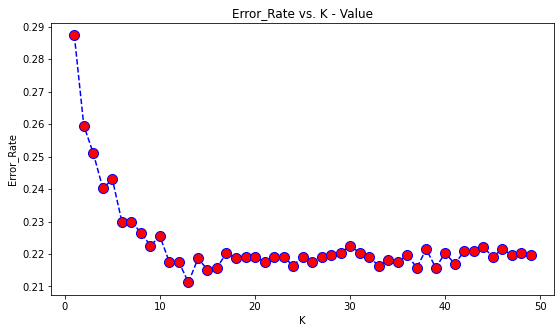

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

error = []

for i in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train, y_train)
    pred = knn_model.predict(X_test)
    error.append(np.mean(pred != y_test))
            
plt.figure(figsize=(9,5))
plt.plot(range(1, 50), error, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error_Rate vs. K - Value')
plt.xlabel('K')
plt.ylabel('Error_Rate')

In [ ]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 11):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

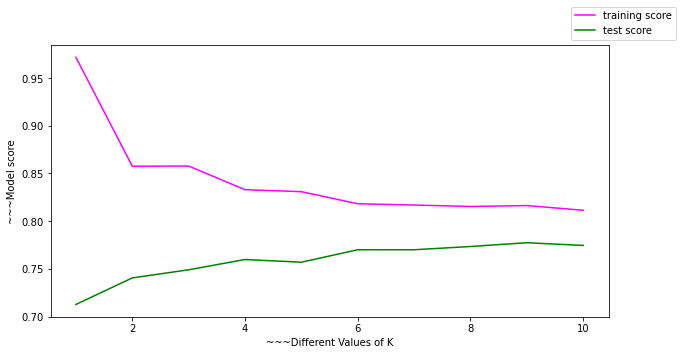

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('~~~Different Values of K')
plt.ylabel('~~~Model score')

plt.plot(k_vals, train_score, color ='fuchsia', label = "training score")
plt.plot(k_vals, test_score, color = 'green', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),bbox_transform=plt.gcf().transFigure)
plt.show()

### AUC is 81 % when k=10 in KNN model:

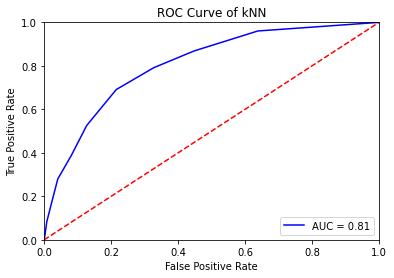

In [ ]:
# here I was tryna to use auc metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

### here, AUC is 83 % when k=50 in KNN model:

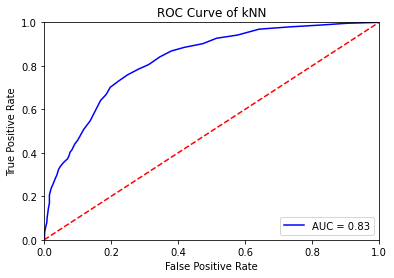

In [ ]:
# here I was tryna to use auc metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(X_train,y_train)

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

# Task 3 (30%)
For dataset from Task 2, create KNN model with k-neighbors from 1 to 101 with step size 2 (1, 3, 5, ..., 99, 101). Then crate bias-variance tradeoff plot (for train and test), in order to choose the best K.

In [ ]:
# put your code here:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = np.arange(1, 101, 2)
accuracy_train, accuracy_test = [], []

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_train = knn.predict(X_train)
    pred_test = knn.predict(X_test)
    accuracy_train.append(accuracy_score(y_train, pred_train))
    accuracy_test.append(accuracy_score(y_test, pred_test))
    
acc_df = pd.DataFrame({'k':k, 'train_acc':accuracy_train, 'test_acc':accuracy_test})

In [ ]:
acc_df = acc_df.melt(id_vars = 'k', var_name = 'train/test', value_name = 'accuracy')

In [ ]:
acc_df

,k,train/test,accuracy
0,1,train_acc,0.971791
1,3,train_acc,0.857819
2,5,train_acc,0.830935
3,7,train_acc,0.816925
4,9,train_acc,0.816357
...,...,...,...
95,91,test_acc,0.780806
96,93,test_acc,0.781942
97,95,test_acc,0.781374
98,97,test_acc,0.782510


<AxesSubplot:xlabel='k', ylabel='accuracy'>

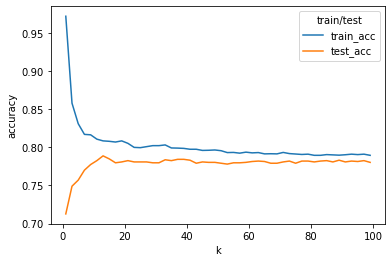

In [ ]:
# PLOTTING THE GRAPH OF BIAS VARIANCE TRADE OFF:
sns.lineplot(data = acc_df, x = 'k', y = 'accuracy', hue = 'train/test')

### Here is the plot- and we can see when k equals  from 0 till 20- then in becames stable till the end.
### it is good.

---

### Evaluation form (Keep it!)

| Question | Mark     | Comment   
|:-------:|:--------:|:----------------------
| 1       |   27/30    | Calculated RMSE instead of MSE.
| 2       |   40/40    | 
| 3       |   30/30    | 
|**Total**|**97/100**  | 
